# NAME - SHREE S NADGAUDA
# REGISTRATION NUMBER- 20BCI7133
# COLLEGE - VIT AP
# ASSIGNMENT 3

In [1]:
import os
import shutil
import time
from torchvision import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import torch.optim as optim

In [2]:
src = "C:\\Users\\shree\\Desktop\\Program files\\SMART_BRIDGE\\archive\\train_data\\train_data"

for path, subdirs, files in os.walk(src):
    print(f"There are {len(subdirs)} directories and {len(files)} images in '{path}'.")

There are 16 directories and 0 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data'.
There are 0 directories and 15 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\blasti'.
There are 0 directories and 6 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\bonegl'.
There are 0 directories and 5 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\brhkyt'.
There are 0 directories and 7 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\cbrtsh'.
There are 0 directories and 7 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\cmnmyn'.
There are 0 directories and 6 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data\gretit'.
There are 0 directories and 10 images in 'C:\Users\shree\Desktop\Program files\SMART_BRIDGE\arc

In [3]:
train_dir = "C:\\Users\\shree\\Desktop\\Program files\\SMART_BRIDGE\\archive\\train_data\\train_data"
test_dir = "C:\\Users\\shree\\Desktop\\Program files\\SMART_BRIDGE\\archive\\test_data\\test_data"

print(train_dir, test_dir)

batch_size=4
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.CenterCrop(224),
     transforms.ToTensor()])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\train_data\train_data C:\Users\shree\Desktop\Program files\SMART_BRIDGE\archive\test_data\test_data


classes ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Image Size:  torch.Size([4, 3, 224, 224])
labels tensor([ 1, 12,  9,  7])
Image Size after resizing:  torch.Size([4, 224, 224, 3])


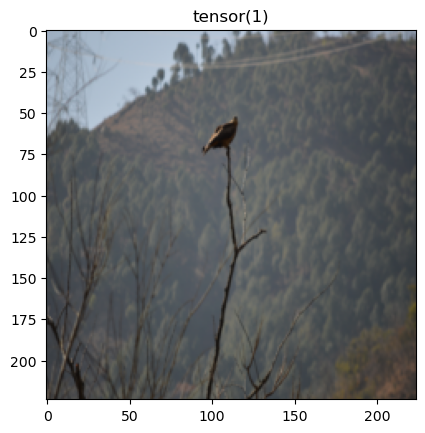

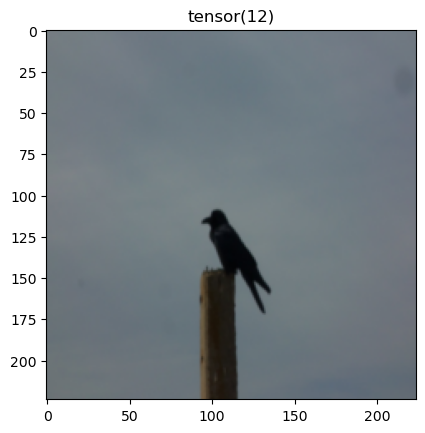

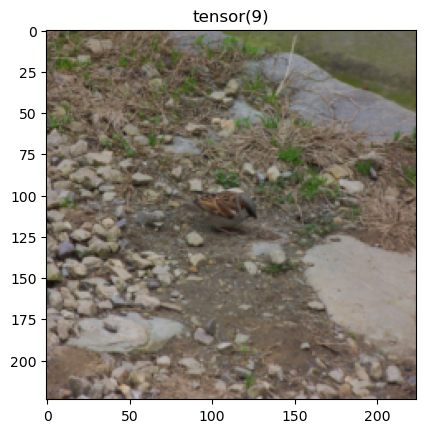

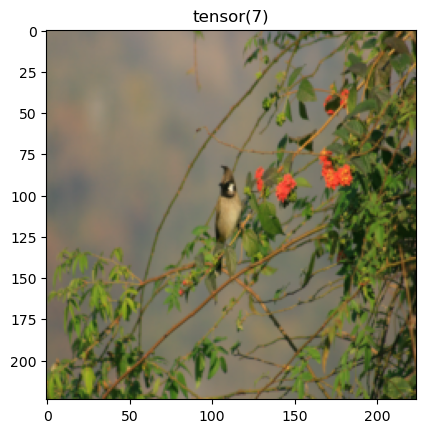

In [4]:
classes = sorted(os.listdir(train_dir))
print("classes", classes)

images, labels = next(iter(train_dataloader))
print("Image Size: ", images.shape)
print("labels", labels)

images = images.permute(0, 2, 3, 1)
print("Image Size after resizing: ", images.shape)
for i in range(batch_size):
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.show()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = torchvision.models.vgg16(pretrained=True).to(device)
#print(model)
"""
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x
    
model.avgpool = Identity()
model.classifier = nn.Sequential(
                    nn.Linear(512, 255), 
                    nn.Dropout(p=0.2),
                    nn.Linear(255, 16)
                    )
"""    

print(model)

C:\Users\shree\anaconda3\envs\tensorflow\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\shree\anaconda3\envs\tensorflow\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
model.classifier[6].out_features = 16

# freeze convolution weights
for param in model.features.parameters():
    param.requires_grad = False
   
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
# optimizer
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()

In [8]:
def fit(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data  in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        
        loss.backward()
        optimizer.step()
   
    train_loss = train_running_loss / len(train_dataloader.dataset)
    train_accuracy = 100. * (train_running_correct / len(train_dataloader.dataset))
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}")
    
    return train_loss, train_accuracy

In [9]:
def validata(model, test_dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    
    for i, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        
        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()
        
    val_loss = val_running_loss / len(test_dataloader.dataset)
    val_accuracy = 100. * (val_running_correct / len(test_dataloader.dataset))
    
    return val_loss, val_accuracy

In [10]:
epochs = 50

train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    train_epoch_loss, train_epoch_accuracy = fit(model, train_dataloader)
    val_epoch_loss, val_epoch_accuracy = validata(model, test_dataloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
end = time.time() 

Train Loss: 1.2100, Train Accuracy: 19.33
Train Loss: 0.2788, Train Accuracy: 64.67
Train Loss: 0.0999, Train Accuracy: 87.33
Train Loss: 0.0351, Train Accuracy: 95.33
Train Loss: 0.0184, Train Accuracy: 97.33
Train Loss: 0.0133, Train Accuracy: 98.00
Train Loss: 0.0085, Train Accuracy: 98.67
Train Loss: 0.0083, Train Accuracy: 98.00
Train Loss: 0.0041, Train Accuracy: 98.67
Train Loss: 0.0022, Train Accuracy: 98.67
Train Loss: 0.0059, Train Accuracy: 98.00
Train Loss: 0.0024, Train Accuracy: 98.67
Train Loss: 0.0033, Train Accuracy: 98.67
Train Loss: 0.0024, Train Accuracy: 98.67
Train Loss: 0.0012, Train Accuracy: 98.67
Train Loss: 0.0017, Train Accuracy: 98.67
Train Loss: 0.0012, Train Accuracy: 98.67
Train Loss: 0.0013, Train Accuracy: 98.67
Train Loss: 0.0012, Train Accuracy: 98.67
Train Loss: 0.0009, Train Accuracy: 98.67
Train Loss: 0.0011, Train Accuracy: 98.67
Train Loss: 0.0011, Train Accuracy: 98.67
Train Loss: 0.0012, Train Accuracy: 98.67
Train Loss: 0.0011, Train Accuracy


KeyboardInterrupt



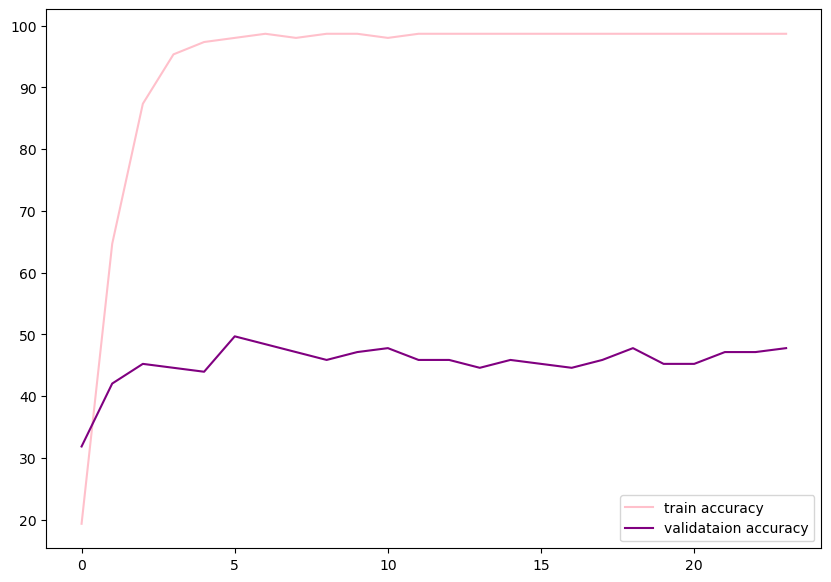

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='pink', label='train accuracy')
plt.plot(val_accuracy, color='purple', label='validataion accuracy')
plt.legend()
plt.savefig('ans_accuracy.jpg')
plt.show()

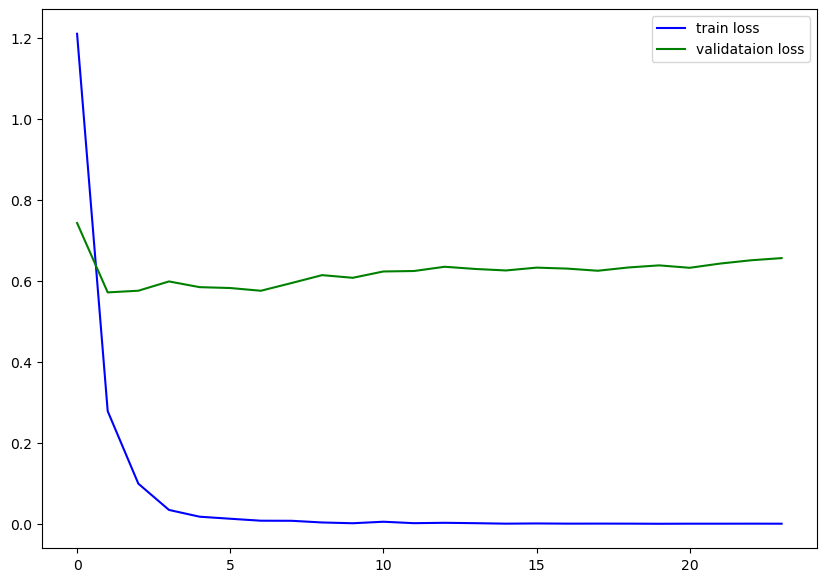

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='blue', label='train loss')
plt.plot(val_loss, color='green', label='validataion loss')
plt.legend()
plt.savefig('loss.png')
plt.show()